# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [3]:
import wbdata
import pandas as pd

indicadores = {"NV.AGR.TOTL.ZS":"val_agr_agro","NV.IND.TOTL.ZS":"val_agr_ind"}  #esos indicadores se encuentran en el source 25 (jobs)

# NV.AGR.TOTL.ZS es el valor agregado de la agricultura, silvicultura y la pesca expresado como porcentaje del PBI
# NV.IND.TOTL.ZS es el valor agregado de la industria (incluye construcción) expresado como porcentaje del PBI

data = wbdata.get_dataframe(indicadores, country=["CHN","ARG"])
df = pd.DataFrame(data=data)

df.reset_index(inplace=True)   

df    #con df[57:64] podemos ver que los valores de Argentina empiezan desde el 1965 para ambas series

,country,date,val_agr_agro,val_agr_ind
0,Argentina,2023,5.929854,25.056382
1,Argentina,2022,6.638297,24.007553
2,Argentina,2021,7.291282,23.499464
3,Argentina,2020,6.357034,22.408876
4,Argentina,2019,5.318556,23.157848
...,...,...,...,...
123,China,1964,38.029798,35.328934
124,China,1963,39.854202,33.068974
125,China,1962,38.986405,31.311306
126,China,1961,35.794855,31.932159


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [6]:
#La estadistica descriptiva será del periodo entre 1965 y 2023, ya que es donde ambos paises registran valores

df_65_23 = df.drop([59,60,61,62,63,123,124,125,126,127])
df_65_23.reset_index(drop=True, inplace=True)     

#con df_65_23.head(59) vemos solo los valores de Argetnina  
#con df_65_23.tail(59) vemos solo los valores de China

df_agg = df_65_23.groupby(by=["country"]).agg({"val_agr_agro":"mean","val_agr_ind":"mean"})   #promedio del porcentaje para ambos indicadores en el periodo
df_agg.reset_index(inplace=True)
df_agg.rename(columns={"val_agr_agro":"promedio_agro", "val_agr_ind":"promedio_ind"}, inplace=True)      #cambio de nombre las columnas
df_agg

,country,promedio_agro,promedio_ind
0,Argentina,7.471744,33.853841
1,China,20.918100,43.161419


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

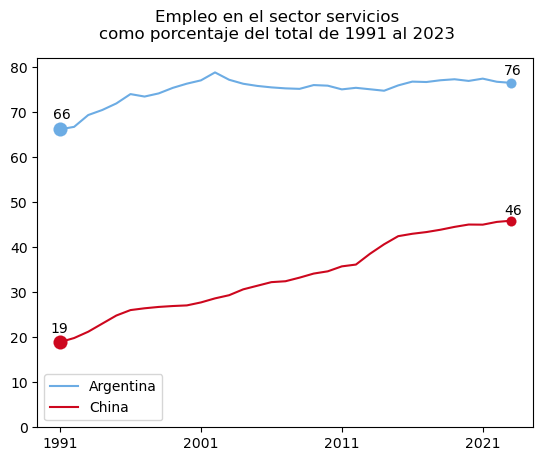

In [9]:
# Resolver acá estilo pyplot

# Primero, importamos lo necesario:
import matplotlib.pyplot as plt
import numpy as np

indicadores2 = {"SL.SRV.EMPL.ZS":"empleo_servicios"}  #Este indicador se encuentran en el source 25 (jobs)

# SL.SRV.EMPL.ZS es el indicador del porcentaje sobre el total del empleo en el sector servicios

data = wbdata.get_dataframe(indicadores2, country=["CHN","ARG"])
df2 = pd.DataFrame(data=data)

df2.reset_index(inplace=True)
df2 = df2.dropna() #Elimino los datos NaN
df2 = df2.sort_values(by='date') #Ordeno los datos por año de menor a mayor (sino en el gráfico cercano al origen de coordenadas)

#Definimos  vectores  de datos  para  serie 1 (Argentina)
y1 = df2[df2["country"]=="Argentina"]["empleo_servicios"]
x1 = df2[df2["country"]=="Argentina"]["date"]

#Definimos  vectores  de datos  para  serie 2 (China)
y2 = df2[df2["country"]=="China"]["empleo_servicios"]
x2 = df2[df2["country"]=="China"]["date"]

#Convierto el vector 'date' en float para un futuro uso
x1 = x1.astype(float)
x2 = x2.astype(float) 
    
#Creamos un gráfico al estilo pyplot
plt.plot(x1, y1, label="Argentina", color= '#6CACE4')
plt.plot(x2, y2, label="China", color='#cd071e')
xticks = list(x1[::10]) # Definir los xticks cada 10 años 
plt.xticks(xticks)
plt.ylim(0, 82) #Delimito lo que muestra el gráfico en el eje de ordenadas

#Agrego título y una descripción destacando la unidad de medida de los valores en las ordenadas
plt.suptitle("Empleo en el sector servicios\ncomo porcentaje del total de 1991 al 2023")

# Agrego leyenda
plt.legend()

#Destaco los primeros y últimos valores con un círculo y el número truncado
plt.text(x1.iloc[0]-0.5, y1.iloc[0]+2.3, f"{y1.iloc[0]:.0f}", fontsize=10) # Utilizo la conversión del vector 'date' para modificar la posición del número truncado (sino me tira error)
plt.text(x2.iloc[0]-0.7, y2.iloc[0]+2, f"{y2.iloc[0]:.0f}", fontsize=10)
plt.text(x1.iloc[-1]-0.5, y1.iloc[-1]+1.8, f"{y1.iloc[-1]:.0f}", fontsize=10)
plt.text(x2.iloc[-1]-0.5, y2.iloc[-1]+1.3, f"{y2.iloc[-1]:.0f}", fontsize=10)
plt.scatter(x2.iloc[0], y2.iloc[0], s=100, facecolors='#cd071e', linewidths=0.1)
plt.scatter(x1.iloc[0], y1.iloc[0], s=100, facecolors='#6CACE4', linewidths=0.1)
plt.scatter(x2.iloc[-1], y2.iloc[-1], s=50, facecolors='#cd071e', linewidths=0.1)
plt.scatter(x1.iloc[-1], y1.iloc[-1], s=50, facecolors='#6CACE4', linewidths=0.1)


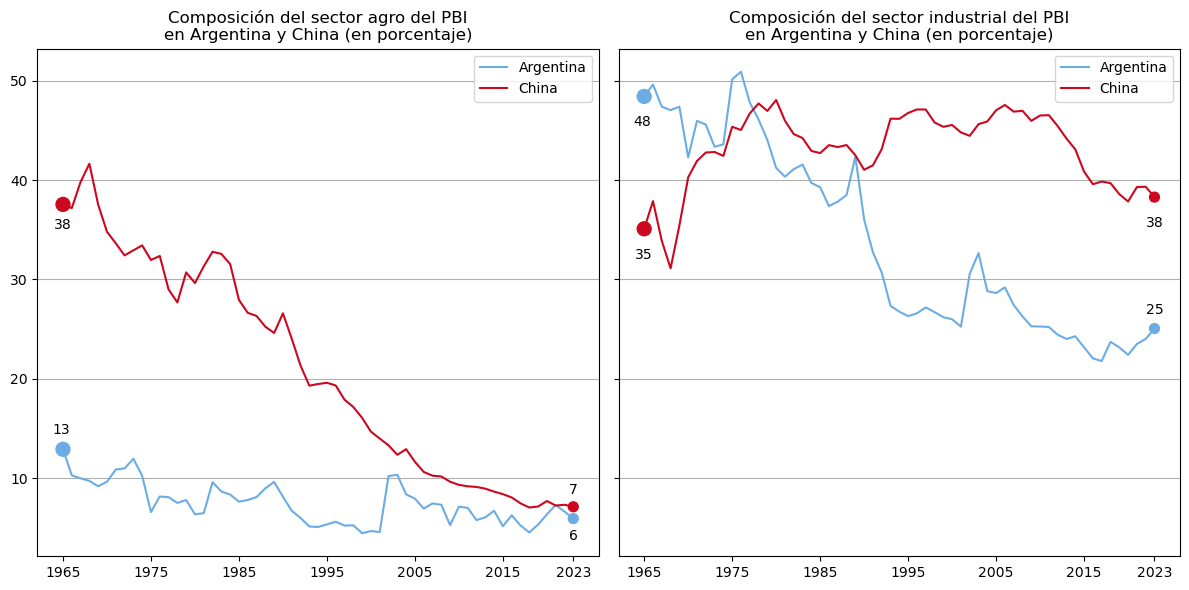

In [11]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Ordenar los años de menor a mayor
df_65_23 = df_65_23.sort_values(by='date')  

#Datos para Argentina
x1 = df_65_23[df_65_23["country"]=="Argentina"]["date"].astype(float)
y1 = df_65_23[df_65_23["country"]=="Argentina"]["val_agr_agro"]
z1 = df_65_23[df_65_23["country"]=="Argentina"]["val_agr_ind"]

#Datos para China
x2 = df_65_23[df_65_23["country"]=="China"]["date"].astype(float)
y2 = df_65_23[df_65_23["country"]=="China"]["val_agr_agro"]
z2 = df_65_23[df_65_23["country"]=="China"]["val_agr_ind"]

#Definir los xticks cada 10 años y asegurarse de incluir el último valor
xticks = list(x1[::10])  #Selecciona cada 10 años
if x1.iloc[-1] not in xticks:  #Asegura que el último año esté incluido
    xticks.append(x1.iloc[-1])

#Crear figura y subgráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  #1 fila, 2 columnas. Comparten el eje Y

#Primer gráfico (Sector Agropecuario)
ax[0].plot(x1, y1, label="Argentina", color='#6CACE4')  
ax[0].plot(x2, y2, label="China", color='#cd071e')  

ax[0].set_title("Composición del sector agro del PBI\nen Argentina y China (en porcentaje)") #Título
ax[0].legend() #Leyenda
ax[0].grid(axis='y') #Agrega lineas grises a los valores en el eje Y
ax[0].set_xticks(xticks)  #Asegura los mismos xticks

#Destaca primeros y últimos valores con un círculo y el valor truncado
ax[0].text(x1.iloc[0]-1.2, y1.iloc[0]+1.5, f"{y1.iloc[0]:.0f}", fontsize=10)
ax[0].text(x2.iloc[0]-1, y2.iloc[0]-2.5, f"{y2.iloc[0]:.0f}", fontsize=10)
ax[0].text(x1.iloc[-1]-0.5, y1.iloc[-1] -2.2, f"{y1.iloc[-1]:.0f}", fontsize=10)
ax[0].text(x2.iloc[-1]-0.5, y2.iloc[-1]+1.3, f"{y2.iloc[-1]:.0f}", fontsize=10)
ax[0].scatter([x1.iloc[0], x2.iloc[0], x1.iloc[-1], x2.iloc[-1]], 
              [y1.iloc[0], y2.iloc[0], y1.iloc[-1], y2.iloc[-1]], 
              s=[100, 100, 50, 50], color=['#6CACE4', '#cd071e', '#6CACE4', '#cd071e'])

#Segundo gráfico (Sector Industrial)
ax[1].plot(x1, z1, label="Argentina", color='#6CACE4')  
ax[1].plot(x2, z2, label="China", color='#cd071e')  

ax[1].set_title("Composición del sector industrial del PBI\nen Argentina y China (en porcentaje)") #Título
ax[1].legend() #leyenda
ax[1].grid(axis='y') #Agrega lineas grises a los valores en el eje Y
ax[1].set_xticks(xticks)  #Asegura los mismos xticks

#Destacar primeros y últimos valores
ax[1].text(x1.iloc[0]-1.2, z1.iloc[0]-3, f"{z1.iloc[0]:.0f}", fontsize=10)
ax[1].text(x2.iloc[0]-1, z2.iloc[0]-3, f"{z2.iloc[0]:.0f}", fontsize=10)
ax[1].text(x1.iloc[-1]-1, z1.iloc[-1]+1.5, f"{z1.iloc[-1]:.0f}", fontsize=10)
ax[1].text(x2.iloc[-1]-1, z2.iloc[-1]-3, f"{z2.iloc[-1]:.0f}", fontsize=10)
ax[1].scatter([x1.iloc[0], x2.iloc[0], x1.iloc[-1], x2.iloc[-1]], 
              [z1.iloc[0], z2.iloc[0], z1.iloc[-1], z2.iloc[-1]], 
              s=[100, 100, 50, 50], color=['#6CACE4', '#cd071e', '#6CACE4', '#cd071e'])

#Ajustes finales
plt.tight_layout()  
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
